In [1]:
import numpy as np

In [2]:
path = "/home/andrea/Desktop/Final/Baseline5Prime/5.1/MW/"
path2 = "/home/andrea/Desktop/Final/Baseline5Prime/5.2/MW/"

In [3]:
files = []
work = 0
allQueueLengths = np.zeros(4)


for mw in [4, 5]:
    key = 0
    for keys in [1, 3, 6, 9]:
        queueRep = np.zeros(3)
        throughput = np.zeros(3)
        latency = np.zeros(3)
        for rep in range(1, 4):
            file = open(path2+"rep"+str(rep)+"/MW"+str(mw)+"/output_C2_T1_W64_K"+str(keys)+"_R"+str(rep)+"/QueueLength.log")
            ind = 0
            lines = []
            for line in file:
                lines.append(line)
            j = 0
            while lines[j] == "0\n":
                j += 1
            j = j
            p = len(lines)-1
            while lines[p] == "0\n":
                p -= 1
            p = (len(lines)-p)
            if p == 0:
                p = 1
            x = np.asarray(lines[j:-p])
            x = x.astype(int)
            queueRep[rep-1] = np.mean(x)
        
        allQueueLengths[key] += np.mean(queueRep)
        key += 1

In [4]:
files = []
work = 0
allQueueLengths1 = np.zeros(4)


for mw in [4, 5]:
    key = 0
    for keys in [1, 3, 6, 9]:
        queueRep = np.zeros(3)
        throughput = np.zeros(3)
        latency = np.zeros(3)
        for rep in range(1, 4):
            file = open(path+"rep"+str(rep)+"/MW"+str(mw)+"/output_C2_T1_W64_K"+str(keys)+"_R"+str(rep)+"/QueueLength.log")
            ind = 0
            lines = []
            for line in file:
                lines.append(line)
            j = 0
            while lines[j] == "0\n":
                j += 1
            j = j
            p = len(lines)-1
            while lines[p] == "0\n":
                p -= 1
            p = (len(lines)-p)
            if p == 0:
                p = 1
            x = np.asarray(lines[j:-p])
            x = x.astype(int)
            queueRep[rep-1] = np.mean(x)
        
        allQueueLengths1[key] += np.mean(queueRep)
        key += 1

In [10]:
fileOutput = open("/home/andrea/Desktop/Final/Baseline5Prime/5.1/QueueLengths.txt", "w")

In [11]:
keys = [1, 3, 6, 9]
fileOutput.write("Mean Queue Length")
for j in range(len(allQueueLengths1)):
    fileOutput.write("\n\nKeys: " + str(keys[j]) + "\n")
    fileOutput.write(str(allQueueLengths1[j]))
fileOutput.close()

In [10]:
import matplotlib.pyplot as plt

In [20]:
plt.figure(figsize=(35, 25))
width = 0.7
margin = 0.05
keys = np.asarray([1, 3, 6, 9])
plt.title('Average Queue Length for different numbers of multi get keys', fontsize= 40)
plt.xlabel("Keys", fontsize= 35)
plt.yticks(fontsize=14)
plt.ylabel("Avg. Queue Length", fontsize= 35)
rect1 = plt.bar(keys-margin, allQueueLengths1, width, tick_label=keys, ecolor='blue', color='lightblue', capsize=7, label="Sharded")
rect = plt.bar(keys+width+margin, allQueueLengths, width,tick_label=keys, ecolor='red', color='lightsalmon', capsize=7, label="Non Sharded")

plt.legend(loc=1, fontsize=30)
plt.xticks(keys + width/2, fontsize = 30)
plt.yticks(fontsize = 30)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%.2f' % float(height), ha='center', va='bottom', fontsize=30)

autolabel(rect)
autolabel(rect1)


In [21]:
plt.savefig("/home/andrea/Desktop/Final/Baseline5Prime/QueueLength.png")

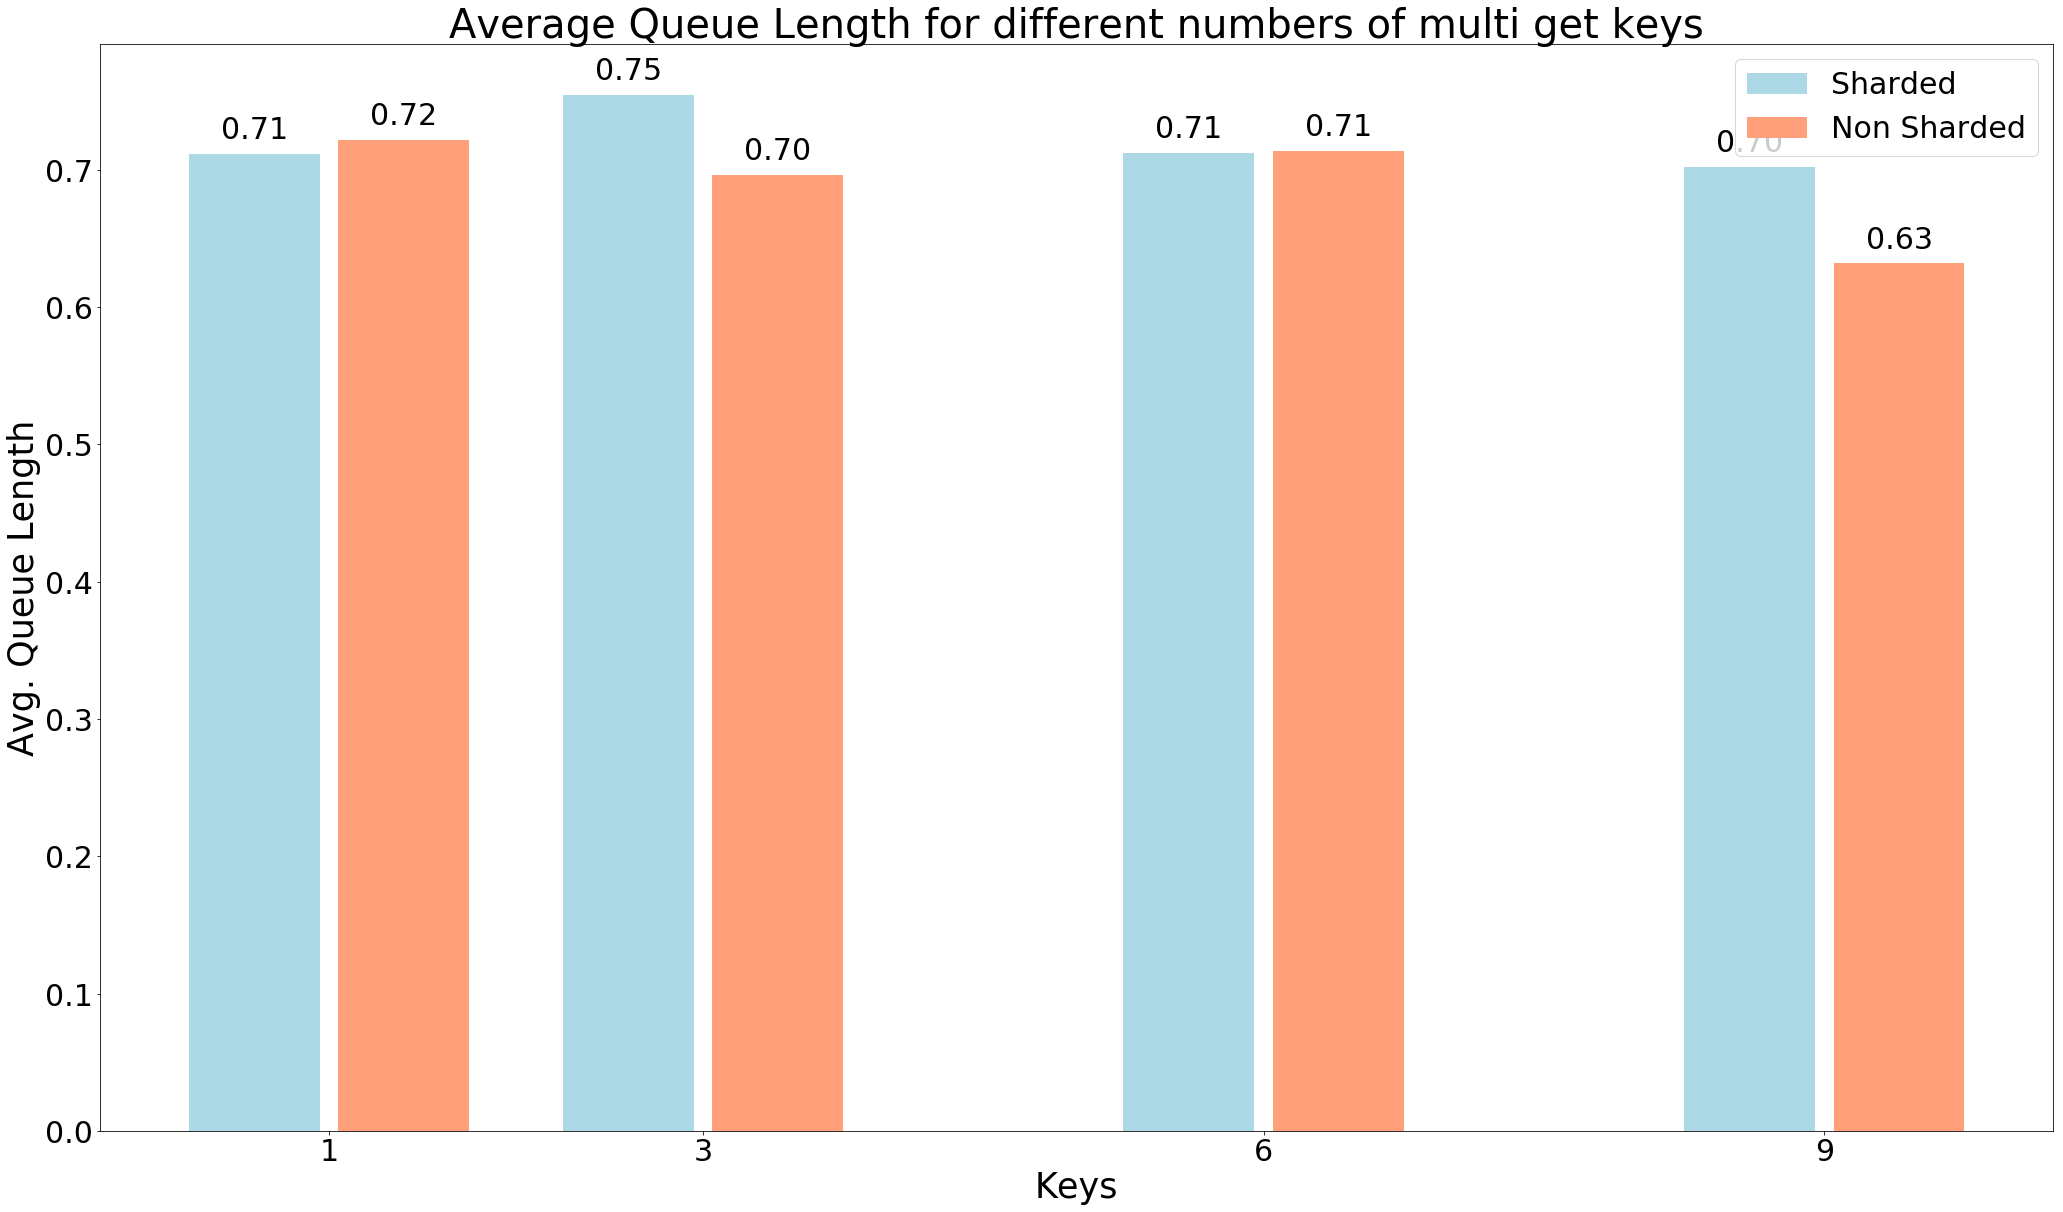

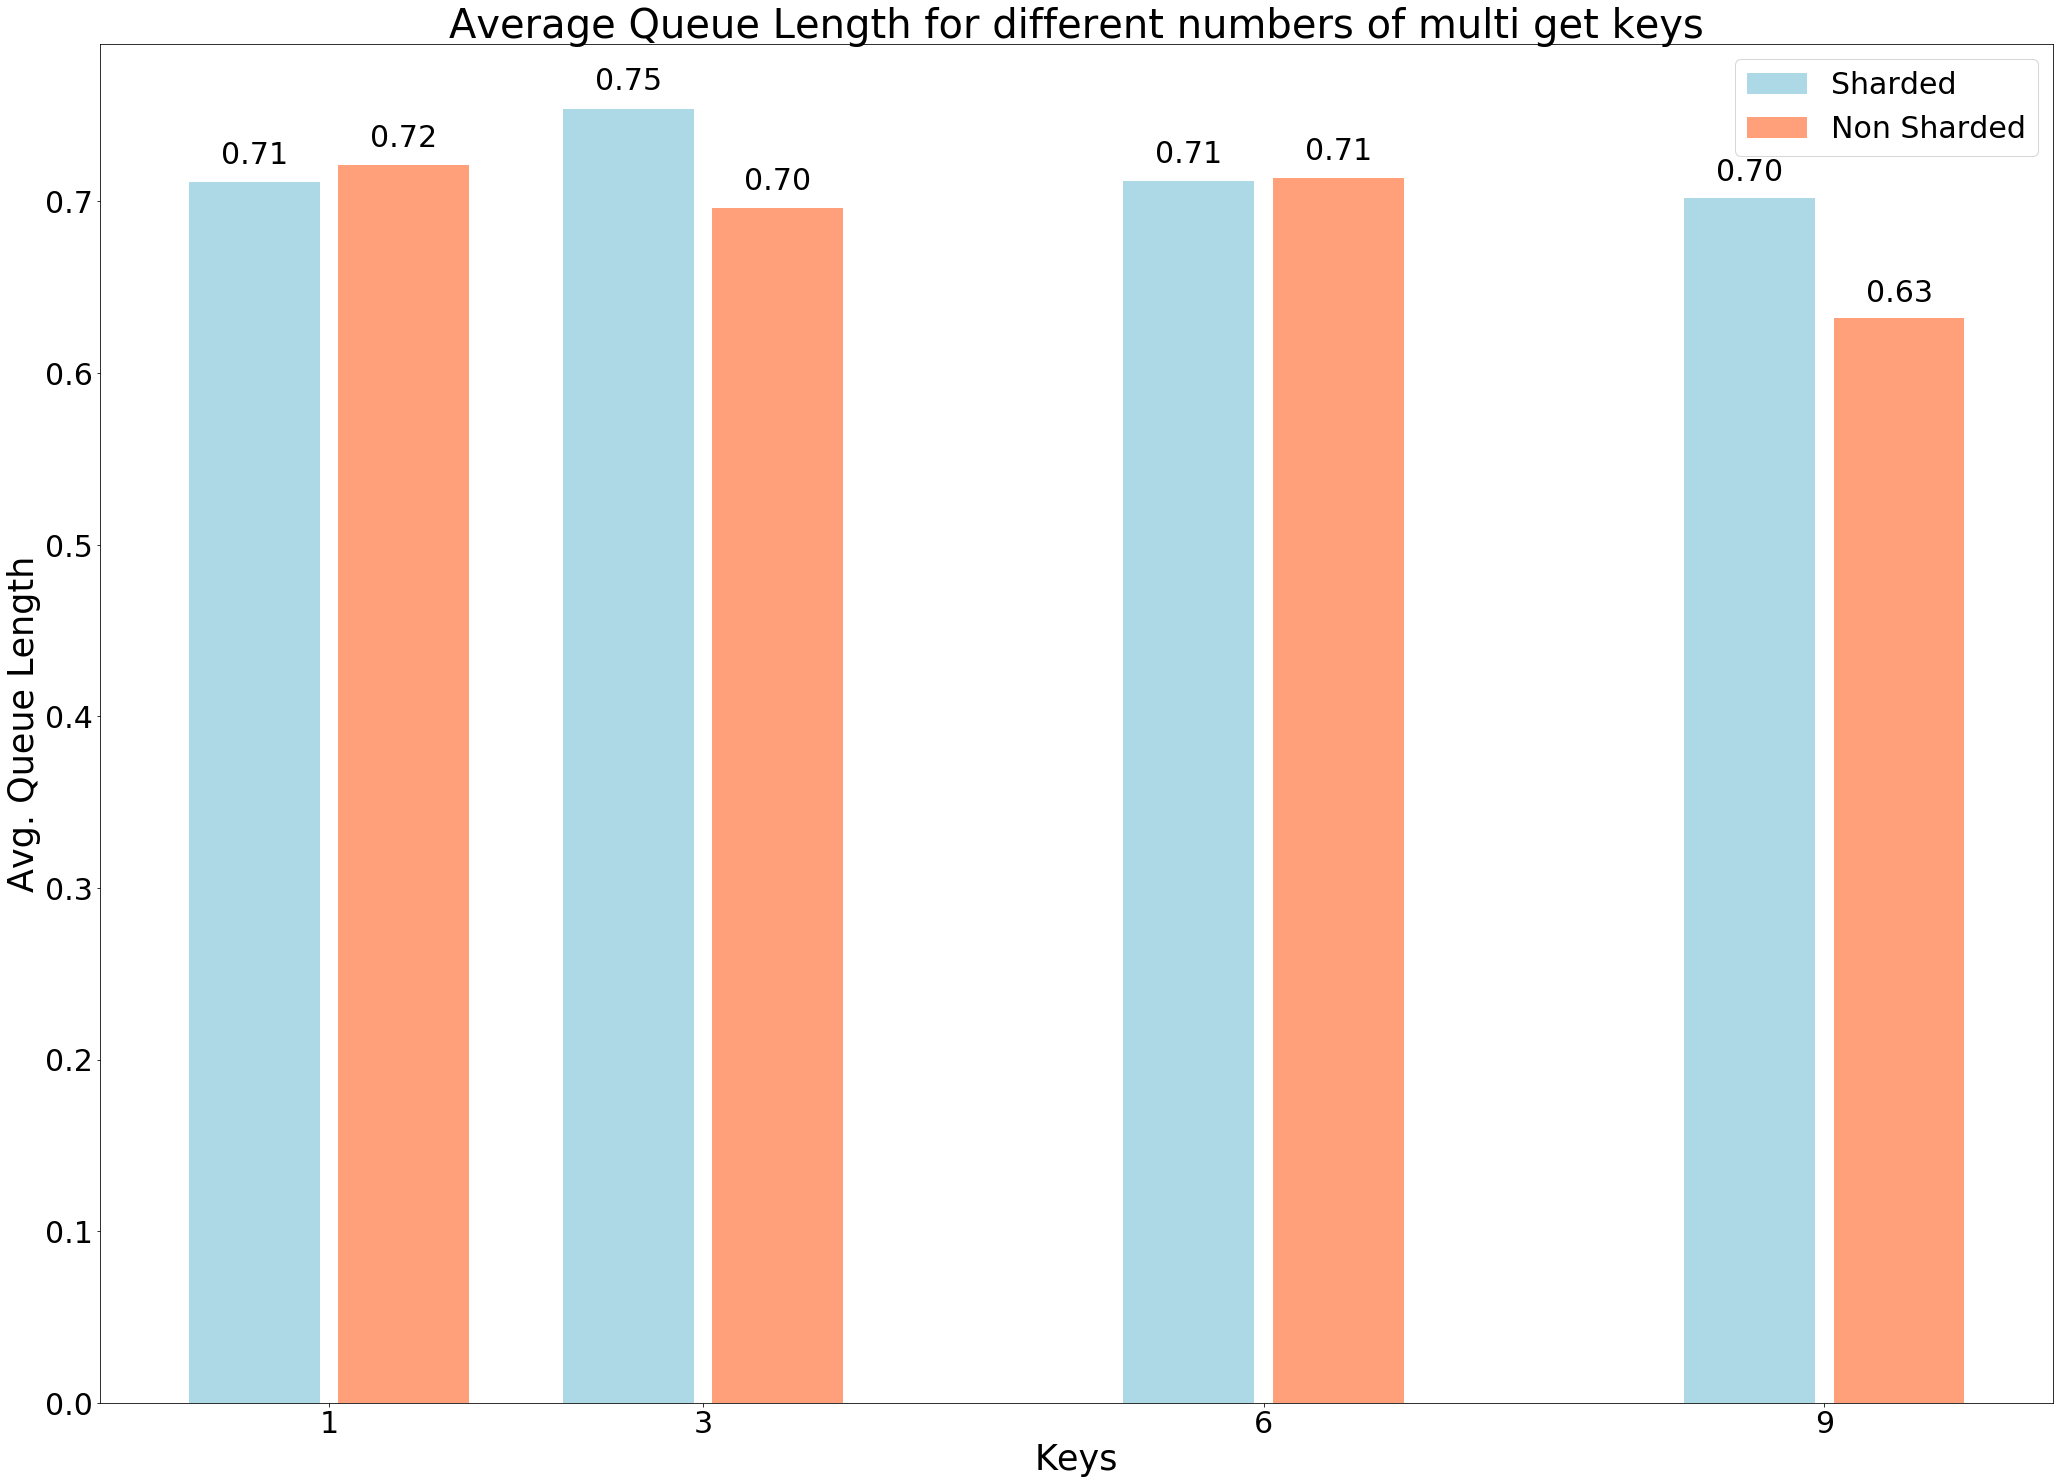

In [19]:
plt.show()

In [27]:
files = []
work = 0
allWorkerTimes = [[],[],[],[]]
allProcessingTimes = [[],[],[],[]]
allServiceTimes =[[],[],[],[]]
allWaitingTimes = [[],[],[],[]]
allResponseTimes = [[],[],[],[]]
allTotalTimes = [[],[],[],[]]

for mw in [4, 5]:
    key = 0
    for keys in [1, 3, 6, 9]:
        for rep in range(1, 4):
            file = open(path+"rep"+str(rep)+"/MW"+str(mw)+"/output_C2_T1_W64_K"+str(keys)+"_R"+str(rep)+"/times.log")
            
            ind = 0
            for line in file:
                splitted = line.split("\t")
                if ind != 0 and len(splitted) > 6:
                    if splitted[1] != "0":
                        allWaitingTimes[key].append(int(splitted[2]))
                        #allWorkerTimes[key].append(int(splitted[3]))
                        allProcessingTimes[key].append(int(splitted[4]))
                        allServiceTimes[key].append(int(splitted[5]))
                        allResponseTimes[key].append(int(splitted[6]))
                        allTotalTimes[key].append(int(splitted[-1]))
                ind += 1
        key += 1

In [28]:
meanTot = np.zeros(4)
meanServ = np.zeros(4)
meanWait = np.zeros(4)
meanProc = np.zeros(4)
for i in range(0, len(allTotalTimes)):
    meanTot[i] = np.mean(allTotalTimes[i])/1000000
    meanServ[i] = np.mean(allServiceTimes[i])/1000000
    meanWait[i] = np.mean(allWaitingTimes[i])/1000000
    meanProc[i] = np.mean(allProcessingTimes[i])/1000000

In [36]:
fileOutput = open("/home/andrea/Desktop/Final/Baseline5Prime/5.1/ServiceTime.txt", "w")

In [37]:
keys = [1, 3, 6, 9]
fileOutput.write("Mean Service Time")
for j in range(len(meanServ)):
    fileOutput.write("\n\nKeys: " + str(keys[j]) + "\n")
    fileOutput.write(str(meanServ[j]))
fileOutput.close()

In [24]:
import matplotlib.pyplot as plt

In [45]:
plt.figure(figsize=(17,13))
width = 1
pos = [5, 10, 15, 20]
pos = np.asarray(pos)
keys = np.asarray([1, 3, 6, 9])
    
plt.title('Component Utilization without Sharding', fontsize= 20)
plt.xlabel("Keys", fontsize= 20)
plt.yticks(fontsize=14)
plt.ylabel("Time [msec]", fontsize= 20)
rect = plt.bar(pos, meanTot, width, color='royalblue',label="Total time in System")
rect2 = plt.bar(pos+2*width, meanWait, width,  color='forestgreen',label="Waiting Time")
rect3 = plt.bar(pos+width, meanServ, width, color='firebrick',label="Service Time")
#rect4 = plt.bar(pos+3*width, meanProc, width, color='C1',label="Processing Time")

#rect4 = plt.bar(pos+3*width, arrayInter[3], width,  color='lightsalmon',label="Response Time")

#rect5 = plt.bar(workers+5*width, meanTot[0][-1], width, tick_label=workers, color='lightblue',label="Total")
#rect6 = plt.bar(workers+6*width, meanServS[0][-1], width, tick_label=workers, color='green',label="Serv")
#rect7 = plt.bar(workers+7*width, meanWait[0][-1], width, tick_label=workers, color='salmon',label="Wait")
#rect8 = plt.bar(workers+8*width, meanRespS[0][-1], width, tick_label="Resp", color='C1',label="Resp")

plt.legend(loc=2, fontsize='xx-large')
plt.xticks(pos +width, keys,  fontsize = 14)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                '%.3f' % float(height), ha='center', va='bottom', fontsize=14)

autolabel(rect)
autolabel(rect2)
autolabel(rect3)
#autolabel(rect4)

In [46]:
plt.savefig("/home/andrea/Desktop/Final/Baseline5Prime/timesNoSharding.png")

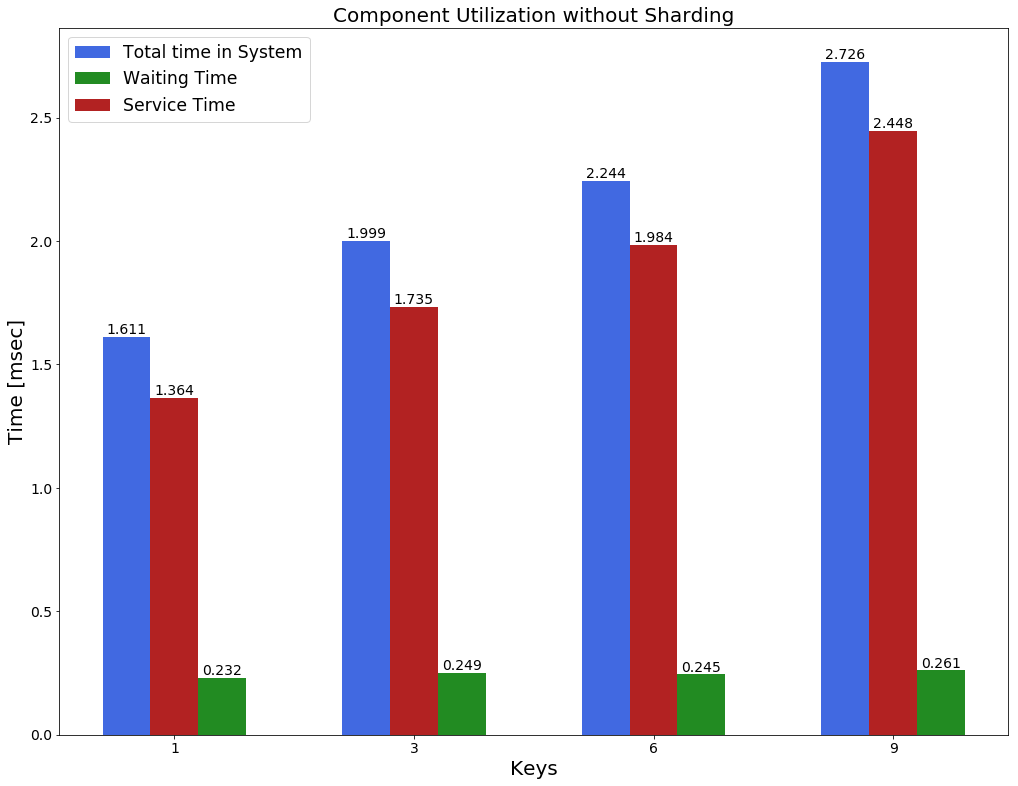

In [44]:
plt.show()